<a href="https://colab.research.google.com/github/Azmal16/Covid_Symptoms_Predict_with_Machine_Learning/blob/main/Data%20Analysis%20and%20Feature%20Engineering/Covid_Symptoms_Checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Importing the modules

In [1]:
import numpy as np
import pandas as pd

<h2>Loading dataset from Github.</h2>
[0 = Absent, 1 = Present]

In [2]:
url = 'https://raw.githubusercontent.com/Azmal16/Covid_Symptoms_Predict_with_Machine_Learning/main/Cleaned-Data.csv'
df = pd.read_csv(url)
display(df)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [3]:
print(df.shape)

(316800, 27)


In [4]:
display(df.describe())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,0.090909,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,0.287480,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

In [6]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

<h2>Putting all the columns related to severity in a single variable.

In [7]:
severity_columns = df.filter(like='Severity_').columns

In [8]:
severity_columns

Index(['Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe'],
      dtype='object')

<h2>Getting rid of unnecessary columns 

We want to keep our dataset as simple as possible. Also,we want to take as less inputs as possible from the users. That’s why we are removing the columns we don’t want to use for the sake of simplicity(In deplyment, we have also removed the Age, Gender, Contact_Don't_know and Contact_No columns too).

In [9]:
df.drop("Country",axis=1,inplace=True)
df.drop("None_Sympton",axis=1,inplace=True)
df.drop("None_Experiencing",axis=1,inplace=True)
df.drop(severity_columns,axis=1,inplace=True)
#Only in deployment
'''df.drop("Age_0-9",axis=1,inplace=True)
df.drop("Age_10-19",axis=1,inplace=True)
df.drop("Age_20-24",axis=1,inplace=True)
df.drop("Age_25-59",axis=1,inplace=True)
df.drop("Age_60+",axis=1,inplace=True)
df.drop("Gender_Female",axis=1,inplace=True)
df.drop("Gender_Transgender",axis=1,inplace=True)
df.drop("Contact_Dont-Know",axis=1,inplace=True)
df.drop("Contact_No",axis=1,inplace=True)'''

'df.drop("Age_0-9",axis=1,inplace=True)\ndf.drop("Age_10-19",axis=1,inplace=True)\ndf.drop("Age_20-24",axis=1,inplace=True)\ndf.drop("Age_25-59",axis=1,inplace=True)\ndf.drop("Age_60+",axis=1,inplace=True)\ndf.drop("Gender_Female",axis=1,inplace=True)\ndf.drop("Gender_Transgender",axis=1,inplace=True)\ndf.drop("Contact_Dont-Know",axis=1,inplace=True)\ndf.drop("Contact_No",axis=1,inplace=True)'

In [10]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
316796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
316797,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
316798,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


<h2> Creating Target Variable

As we can see, there is no attribute in this dataset which tells us whether a person is Covid positive or not. So, we are adding a new column called 'Symptoms_Score'. It will be our target variable. We will predict the 'Symptoms_Score's of the users from the data provided by themselves.

In [11]:
df['Symptoms_Score'] = df.iloc[:,:9].sum(axis=1) + df.iloc[:,19:20].sum(axis=1)#for deployment 10:11

In [12]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score
0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,10
1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,9
2,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,1,0,0,9
3,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,10
4,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
316796,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
316797,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1
316798,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0


This is the final dataset we want to use and apply our models to.

In [13]:
display(df.describe())

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Symptoms_Score
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.363636,0.545455,0.545455,0.363636,0.200000,0.200000,0.200000,0.200000,0.200000,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,4.339015
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.481046,0.497930,0.497930,0.481046,0.400001,0.400001,0.400001,0.400001,0.400001,0.471405,0.471405,0.471405,0.471405,0.471405,0.471405,1.799790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Fever                    316800 non-null  int64
 1   Tiredness                316800 non-null  int64
 2   Dry-Cough                316800 non-null  int64
 3   Difficulty-in-Breathing  316800 non-null  int64
 4   Sore-Throat              316800 non-null  int64
 5   Pains                    316800 non-null  int64
 6   Nasal-Congestion         316800 non-null  int64
 7   Runny-Nose               316800 non-null  int64
 8   Diarrhea                 316800 non-null  int64
 9   Age_0-9                  316800 non-null  int64
 10  Age_10-19                316800 non-null  int64
 11  Age_20-24                316800 non-null  int64
 12  Age_25-59                316800 non-null  int64
 13  Age_60+                  316800 non-null  int64
 14  Gender_Female            316800 non-

Thankfully, there is no non-null value in any column.

<h2>Looking for correlations:

In [15]:
corr_matrix = df.corr()
corr_matrix["Symptoms_Score"].sort_values(ascending=False)

Symptoms_Score             1.000000e+00
Dry-Cough                  5.118873e-01
Tiredness                  4.514422e-01
Difficulty-in-Breathing    4.514422e-01
Runny-Nose                 4.149903e-01
Nasal-Congestion           4.149903e-01
Fever                      3.043622e-01
Sore-Throat                3.043622e-01
Diarrhea                   2.863705e-01
Pains                      2.863705e-01
Contact_Yes                2.619223e-01
Gender_Transgender         2.643565e-19
Age_25-59                  2.073736e-19
Age_20-24                  2.073736e-19
Age_10-19                  2.073736e-19
Age_60+                    1.674566e-19
Gender_Female              7.600250e-20
Gender_Male               -1.354827e-19
Age_0-9                   -2.911019e-19
Contact_Dont-Know         -1.309612e-01
Contact_No                -1.309612e-01
Name: Symptoms_Score, dtype: float64

As we see here, Dry-Cough, Tiredness, Breathing Difficulty, Runny Nose and Nasal Congestion mostly affect the Symptoms_Score.

<h2>Data Visualization

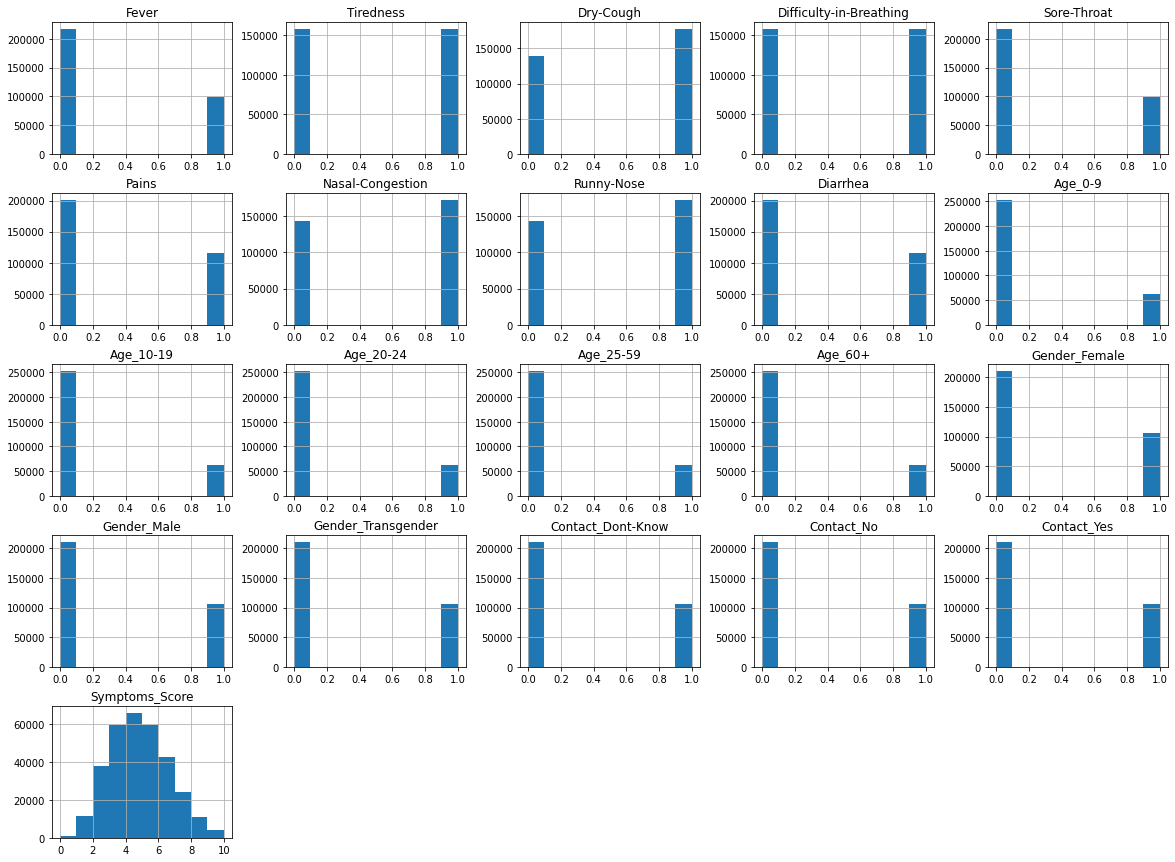

In [16]:
import matplotlib.pyplot as plt
df.hist(bins = 10,figsize=(20,15))
plt.show()

<h2>Separating Data and target 

In [17]:
X = df.iloc[:, :20].values #for deployment [:, :11]
y = df.iloc[:,20:21].values #for deployment [:, 11:12]

In [18]:
X

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [19]:
y

array([[10],
       [ 9],
       [ 9],
       ...,
       [ 1],
       [ 0],
       [ 0]], dtype=int64)

In [20]:
X.shape

(316800, 20)

In [21]:
y.shape

(316800, 1)

<h2>Splitting Train and Test dataset.

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

<h2>A function for calculating the performance measurements of different Models.

In [23]:
from sklearn import metrics
def performance_measurements(model_name,pred_data):
  cm = metrics.confusion_matrix(y_test, pred_data) 
  print("Confusion Matrix of"+model_name+":",cm)

  accuracy = metrics.accuracy_score(y_test, pred_data) 
  print("Accuracy score of "+model_name+":",accuracy)  

  precision = metrics.precision_score(y_test, pred_data,pos_label='positive',
                                           average='micro') 
  print("Precision score of"+model_name+":",precision)

  recall = metrics.recall_score(y_test, pred_data,pos_label='positive',
                                           average='micro') 
  print("Recall score of"+model_name+":",recall)

  f1_score = metrics.f1_score(y_test, pred_data,pos_label='positive',
                                           average='micro')
  print("F1 score of"+model_name+":",f1_score)

<h3> Trying our Models: <br> 
1. Linear Regression

Fitting:

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Prediction:

In [25]:
y_pred_lr = lr.predict(X_test).astype(int)

In [26]:
y_pred_lr

array([[4],
       [3],
       [2],
       ...,
       [6],
       [3],
       [3]])

Performance Measurement of Linear Regression:

In [27]:
performance_measurements("Linear Regression",y_pred_lr)

Confusion Matrix ofLinear Regression: [[ 240    0    0    0    0    0    0    0    0    0    0]
 [2028  257    0    0    0    0    0    0    0    0    0]
 [   0 5921 1620    0    0    0    0    0    0    0    0]
 [   0    0 7852 4064    0    0    0    0    0    0    0]
 [   0    0    0 6356 6892    0    0    0    0    0    0]
 [   0    0    0    0 3912 7972    0    0    0    0    0]
 [   0    0    0    0    0 1570 6892    0    0    0    0]
 [   0    0    0    0    0    0  275 4492    0    0    0]
 [   0    0    0    0    0    0    0   27 2110    0    0]
 [   0    0    0    0    0    0    0    0    0  767    0]
 [   0    0    0    0    0    0    0    0    0    0  113]]
Accuracy score of Linear Regression: 0.5590119949494949
Precision score ofLinear Regression: 0.5590119949494949
Recall score ofLinear Regression: 0.5590119949494949
F1 score ofLinear Regression: 0.5590119949494949


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


<h2>2. K-Neighbours-Regressor

Fitting:

In [28]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Prediction:

In [ ]:
y_pred_knr = knr.predict(X_test).astype(int)

Performance measurement of K-Neighbours-Regressor:

In [ ]:
performance_measurements("KNeighborsRegressor",y_pred_knr)

<h2>3. Decision Tree Regressor



Fitting:

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train, y_train)

Prediction:

In [ ]:
y_pred_dtr = dtr.predict(X_test).astype(int)

Performance of Decision Tree Regressor:

In [ ]:
performance_measurements("Decision Tree  Regression",y_pred_dtr)

K Neighbours Regressor and Decision Tree Regressor provides surprisingly good and similar accuracy. We can implement either of these models for our deployment.

<h2>Evaluating Cross-Validation scores for each models.

In [ ]:
results = []
names = []
models = []
models.append(("LR", lr))
models.append(("KNR", knr))
models.append(("DTR", dtr))

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

All of the models show similar CV scores.

In [ ]:
df

<h2>Custom prediction with DTR model

In [ ]:
symptoms_matrix = [[1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]]
final_prediction = dtr.predict(symptoms_matrix).astype(int)*10
fp = final_prediction[0].astype(str)
if symptoms_matrix[0][19] == 1:
  print("Your symptoms match with " + fp + "% of the Covid symptoms.\nAs you have been in contact with a Covid patient,\n we highly recommend you to have a test and stay isolated unitil the result comes.")
elif symptoms_matrix[0][19] == 0:
  print("Your symptoms match with " + fp + "% of the Covid symptoms.")